##### Imports

In [3]:
import sys
sys.path.append('../') # to import from previous dir folders

import gymnasium as gym
import random

# importing functions from utils
from helpers.loggers import logger
import helpers.utils as utils
import helpers.agents as agents

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [4]:
env = gym.make("Taxi-v3", render_mode="ansi")

# seed random generators and the environment to replicate results
utils.seed(42, env)

In [5]:
n_episodes = agents.Value(data=10000, label='n_Episodes')
agent = agents.QLearningAgent(env, epsilon = 0.1, n_episodes = n_episodes.data)

In [6]:
# For plotting metrics
epochs_per_episode = []
penalties_per_episode = []


for episode in range(n_episodes.data):
    # defining and keeping track of values
    penalties = agents.Value(data=0, label='penalties')
    total_rewards = agents.Value(data=0, label='penalties')    
    epochs = agents.Value(data=0, label='epochs')
    
    # both terminated, truncated are returned on every step
    terminated, truncated = False, False
    
    # reset the environment
    obs, info = env.reset() # obs, info

    # training loop
    while not ((terminated) or (truncated)):
        # get the action value
        action = agent.get_action(obs)

        # take a step towards the solution
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent parameters
        agent.update_q_table(obs, action, reward, next_obs)
    
        # keep track of values
        total_rewards += reward
        if reward == -10:
            penalties += reward #1
        
        epochs += 1
        obs = next_obs # update the next state
    #     # logger.info(f"Episode {_ + 1}: Length = {epochs.data}, Terminated = {terminated}, Truncated = {truncated}")

    
    epochs_per_episode.append(epochs.data)
    penalties_per_episode.append(penalties.data)


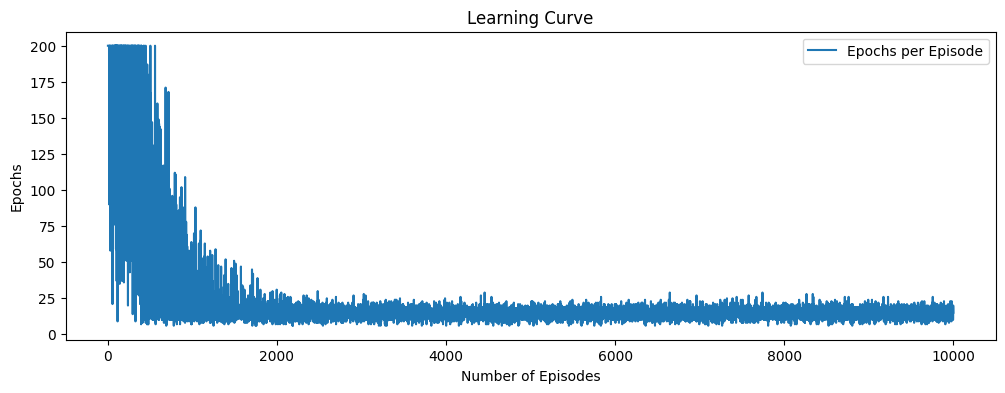

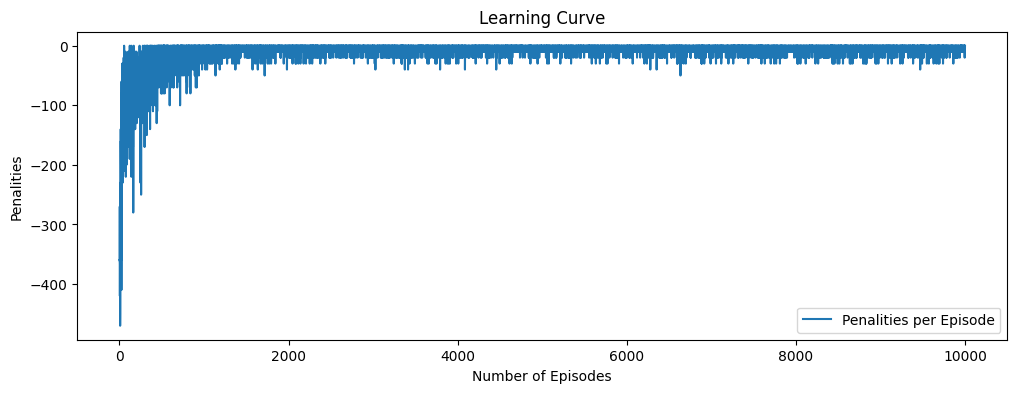

In [7]:
utils.plot_learning(list(range(1, n_episodes.data + 1)), epochs_per_episode, legend_title='Epochs per Episode', ylabel='Epochs')
utils.plot_learning(list(range(1, n_episodes.data + 1)), penalties_per_episode, legend_title='Penalities per Episode', ylabel='Penalities')

#### Let's test visually!

In [8]:
agent.test()

Step 0: [3, 2, 1, 0], Reward: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 1: [2, 2, 1, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 2: [2, 3, 1, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 3: [1, 3, 1, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 4: [1, 4, 1, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 5: [0, 4, 1, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 6: [0, 4, 4, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step 7: [0, 3, 4, 0], Reward: -1
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------

In very few epochs/steps, it sucessfully performs the task.